# Resistivity Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit #used for curve fitting
import random
import uncertainties as un
from uncertainties import unumpy

Text(0.5, 1.0, 'Expanding Spread Analysis - Raw Data')

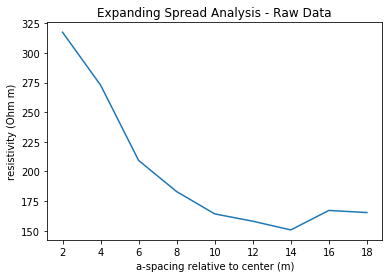

In [5]:
#First thing's first, let's load up the data!
#Here are the C1, C2, P1, P2 electrode distance arrays
c1x = np.array([0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,8,8,8,8,8,8,8,8,8,10,10,10,10,10,10,10,10,10,12,12,12,12,12,12,12,12,12,14,14,14,14,14,14,14,14,14,16,16,16,16,16,16,16,16,16,18,18,18,18,18,18,18,18,18,20,20,20,20,20,20,20,20,20,22,22,22,22,22,22,22,22,22,24,24,24,24,24,24,24,24,24,26,26,26,26,26,26,26,26,26,28,28,28,28,28,28,28,28,28,30,30,30,30,30,30,30,30,30,32,32,32,32,32,32,32,32,32,34,34,34,34,34,34,34,34,34,36,36,36,36,36,36,36,36,36,38,38,38,38,38,38,38,38,38,40,40,40,40,40,40,40,40,40,42,42,42,42,42,42,42,42,44,44,44,44,44,44,44,44,46,46,46,46,46,46,46,46,48,48,48,48,48,48,48,50,50,50,50,50,50,50,52,52,52,52,52,52,52,54,54,54,54,54,54,56,56,56,56,56,56,58,58,58,58,58,58,60,60,60,60,60,62,62,62,62,62,64,64,64,64,64,66,66,66,66,68,68,68,68,70,70,70,70,72,72,72,74,74,74,76,76,76,78,78,80,80,82,82,84,86,88])
c2x = np.array([54,48,42,36,30,24,18,12,6,56,50,44,38,32,26,20,14,8,58,52,46,40,34,28,22,16,10,60,54,48,42,36,30,24,18,12,62,56,50,44,38,32,26,20,14,64,58,52,46,40,34,28,22,16,66,60,54,48,42,36,30,24,18,68,62,56,50,44,38,32,26,20,70,64,58,52,46,40,34,28,22,72,66,60,54,48,42,36,30,24,74,68,62,56,50,44,38,32,26,76,70,64,58,52,46,40,34,28,78,72,66,60,54,48,42,36,30,80,74,68,62,56,50,44,38,32,82,76,70,64,58,52,46,40,34,84,78,72,66,60,54,48,42,36,86,80,74,68,62,56,50,44,38,88,82,76,70,64,58,52,46,40,90,84,78,72,66,60,54,48,42,92,86,80,74,68,62,56,50,44,94,88,82,76,70,64,58,52,46,90,84,78,72,66,60,54,48,92,86,80,74,68,62,56,50,94,88,82,76,70,64,58,52,90,84,78,72,66,60,54,92,86,80,74,68,62,56,94,88,82,76,70,64,58,90,84,78,72,66,60,92,86,80,74,68,62,94,88,82,76,70,64,90,84,78,72,66,92,86,80,74,68,94,88,82,76,70,90,84,78,72,92,86,80,74,94,88,82,76,90,84,78,92,86,80,94,88,82,90,84,92,86,94,88,90,92,94])
p1x = np.array([18,16,14,12,10,8,6,4,2,20,18,16,14,12,10,8,6,4,22,20,18,16,14,12,10,8,6,24,22,20,18,16,14,12,10,8,26,24,22,20,18,16,14,12,10,28,26,24,22,20,18,16,14,12,30,28,26,24,22,20,18,16,14,32,30,28,26,24,22,20,18,16,34,32,30,28,26,24,22,20,18,36,34,32,30,28,26,24,22,20,38,36,34,32,30,28,26,24,22,40,38,36,34,32,30,28,26,24,42,40,38,36,34,32,30,28,26,44,42,40,38,36,34,32,30,28,46,44,42,40,38,36,34,32,30,48,46,44,42,40,38,36,34,32,50,48,46,44,42,40,38,36,34,52,50,48,46,44,42,40,38,36,54,52,50,48,46,44,42,40,38,56,54,52,50,48,46,44,42,40,58,56,54,52,50,48,46,44,42,58,56,54,52,50,48,46,44,60,58,56,54,52,50,48,46,62,60,58,56,54,52,50,48,62,60,58,56,54,52,50,64,62,60,58,56,54,52,66,64,62,60,58,56,54,66,64,62,60,58,56,68,66,64,62,60,58,70,68,66,64,62,60,70,68,66,64,62,72,70,68,66,64,74,72,70,68,66,74,72,70,68,76,74,72,70,78,76,74,72,78,76,74,80,78,76,82,80,78,82,80,84,82,86,84,86,88,90])
p2x = np.array([36,32,28,24,20,16,12,8,4,38,34,30,26,22,18,14,10,6,40,36,32,28,24,20,16,12,8,42,38,34,30,26,22,18,14,10,44,40,36,32,28,24,20,16,12,46,42,38,34,30,26,22,18,14,48,44,40,36,32,28,24,20,16,50,46,42,38,34,30,26,22,18,52,48,44,40,36,32,28,24,20,54,50,46,42,38,34,30,26,22,56,52,48,44,40,36,32,28,24,58,54,50,46,42,38,34,30,26,60,56,52,48,44,40,36,32,28,62,58,54,50,46,42,38,34,30,64,60,56,52,48,44,40,36,32,66,62,58,54,50,46,42,38,34,68,64,60,56,52,48,44,40,36,70,66,62,58,54,50,46,42,38,72,68,64,60,56,52,48,44,40,74,70,66,62,58,54,50,46,42,76,72,68,64,60,56,52,48,44,74,70,66,62,58,54,50,46,76,72,68,64,60,56,52,48,78,74,70,66,62,58,54,50,76,72,68,64,60,56,52,78,74,70,66,62,58,54,80,76,72,68,64,60,56,78,74,70,66,62,58,80,76,72,68,64,60,82,78,74,70,66,62,80,76,72,68,64,82,78,74,70,66,84,80,76,72,68,82,78,74,70,84,80,76,72,86,82,78,74,84,80,76,86,82,78,88,84,80,86,82,88,84,90,86,88,90,92])
#And the resistivity array
rho_a = np.array([190.34,180.15,159.22,157.28,147.39,187.5,274.74,360.65,678.96,195.34,187.6,175.82,163.43,153.91,155.99,231.58,296.13,447.15,192.49,190.82,191.22,173.64,171.65,161.08,226.34,280.97,443.69,184.81,193.73,188.2,192.64,182.52,166.19,185.99,276.9,449.02,177.78,198.47,188.24,203.41,207.33,183.17,189.94,275.67,405.19,172.58,192.69,187.9,191.04,214.12,213.89,202.34,259.47,388.88,163.96,181.72,191.07,184.06,206.69,227.13,229.8,248.14,415.99,158.24,168.97,185.07,186.39,181.97,221.6,233.85,260.81,303.33,171.82,157.98,172.35,185.64,174.37,195.81,233.06,264.87,410.26,165.5,159.99,162.52,174.86,177.4,164.65,216.6,247.3,372.5,165.33,164.76,158.19,171.56,189.29,168.66,205.2,253.4,360.46,170.82,165.97,156.12,176.92,186.41,183.07,180.65,262.12,385.57,183.17,167.13,157.98,166.11,185.23,202.86,175.45,252.53,365.14,192.1,171.03,150.69,156.46,186.49,211.39,209.16,209.49,512.95,194.76,186.27,159.03,158.05,174.24,200.12,255.86,251.71,525.77,200.19,198.69,179.77,158.03,159.52,198.06,255.15,323.07,504.66,206.15,201.03,187.34,165.16,164.21,178.15,236.15,355.73,580.2,184.48,199.94,199.37,174.91,160.35,163.44,194.91,307.49,572.68,190.74,197.87,206.28,200.37,169.39,183.01,187.58,273.49,661.34,200.2,192,202.31,218.57,190.3,193.33,209.31,285.42,580.34,201.18,199.73,208.44,218.02,230.65,214.76,263.22,280.86,581.87,200.68,196.92,218.96,239.92,224.81,255.2,272.87,356.46,193.84,195.25,215.96,230.23,221.21,253.07,284.93,317.5,187.02,184.29,192.94,222.46,244.04,244.59,317.1,237.5,175.42,178.55,212.13,237.98,255.85,317,324.86,173.47,174.68,177.64,220.37,248.09,353.87,412.73,186.18,170.85,171.72,212.75,265.77,436.07,650.09,173.18,172.69,182.83,261.3,422.16,844.61,185.54,178.11,177.94,248.58,371.31,1123.56,212.33,180.67,189.86,225.56,382.59,1088.79,214.25,195.34,234.69,443.29,1011.18,241.57,230.23,228.66,321.25,767.09,236.6,240.81,239.41,250.58,572.53,235.7,246.79,285.9,320.36,241.4,261.9,301.5,357.53,227.29,244.37,254.87,399.07,243.29,274.08,455.55,243.49,340.65,452.25,248.06,329.61,589.8,294.74,467.56,304.65,738.92,336.53,578.67,664.92,533.86,380.71])

#Let's get the a-spacing for each set
a_spacing_raw = (c2x-c1x)/3.0
centers = (c2x+c1x)/2.0

#And zip all this info up for easy handling and sorting
z = zip(c1x,c2x,rho_a,a_spacing_raw,centers)
zlist = list(z)

#In order to get the correct points for the expanding traverse, we can set up an alternating/rocking
#algorithm. This is kind of a blackbox, if you want to understand more of the algorithm
#feel free to break it down!
c1loc = 44 #initial point c1
c2loc = 50 #initial point c2
results = []
iternum = 1
while c2loc < max(c2x) and c1loc > min(c1x):
    next_point = [item for item in zlist if item[0] == c1loc and item[1] == c2loc]
    if next_point:
        results.append(next_point[0])
    if iternum%2: #odd iteration
        c1loc = c1loc-2
        c2loc = c2loc+4
    else: #even iteration
        c1loc = c1loc-4
        c2loc = c2loc+2
    iternum = iternum+1

    
#Here are our final a-spacings and resistivities!
a_spacings = [x[3] for x in results]
rho_as = [x[2] for x in results]

plt.figure()
plt.plot(a_spacings,rho_as)
plt.xlabel("a-spacing relative to center (m)")
plt.ylabel("resistivity (Ohm m)")
plt.title("Expanding Spread Analysis - Raw Data")

[361.81170632 332.10332885 302.78490393 273.08872677 243.4667196
 213.88053751 184.25462583 154.54624835 125.22782344  95.53164628]


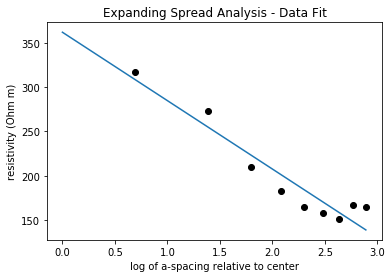

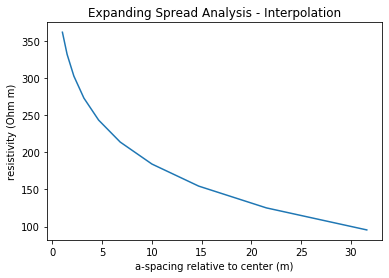

In [6]:
#Now we can fit this line and get the a-spacing values for the Resist program. 
fit = np.polyfit(np.log(a_spacings),rho_as,1)
newx = np.linspace(1,18,100)

#let's plot the initial log plot and fit
plt.figure()
plt.scatter(np.log(a_spacings),rho_as,color='k')
plt.plot(np.log(newx),np.poly1d([*fit])(np.log(newx)))
plt.xlabel("log of a-spacing relative to center")
plt.ylabel("resistivity (Ohm m)")
plt.title("Expanding Spread Analysis - Data Fit")

#1 m, 2.15 m, 3.16 m, 4.64 m, 6.81 m, 10 m, 14.7 m, 21.5m, 31.6 m
#Here's the interpolation list
interpspacing = np.array([1,1.47,2.15,3.16,4.64,6.81,10,14.7,21.5,31.6])
rho_a_interp = np.poly1d([*fit])(np.log(interpspacing))
plt.figure()
plt.plot(interpspacing,rho_a_interp)
plt.xlabel("a-spacing relative to center (m)")
plt.ylabel("resistivity (Ohm m)")
plt.title("Expanding Spread Analysis - Interpolation")
#And the final interpolated resistivity values at the necessary a-spacings!
print(rho_a_interp)

In [10]:
#Now for a constant spread traverse of the data
#Let's get all a-spacings of 4, 8, and 16
a4 = []
a8 = []
a16 = []
for i in range(0,len(zlist)):
    if zlist[i][3] == 4:
        a4.append(zlist[i])
    if zlist[i][3] == 8:
        a8.append(zlist[i])
    if zlist[i][3] == 16:
        a16.append(zlist[i])

#And we can pull out just the a-spacings and resistivity values from the zip
xa4 = [c1x_loc[4] for c1x_loc in a4]
rho_a4 = [rho[2] for rho in a4]

xa8 = [c1x_loc[4] for c1x_loc in a8]
rho_a8 = [rho[2] for rho in a8]

xa16 = [c1x_loc[4] for c1x_loc in a16]
rho_a16 = [rho[2] for rho in a16]

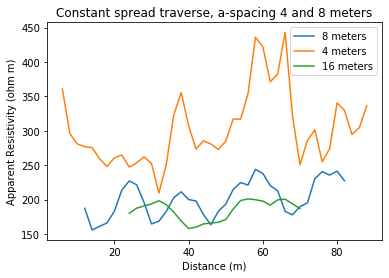

In [11]:
#Let's go ahead and pot all the traverses!
plt.figure()
plt.plot(xa8,rho_a8,label="8 meters")
plt.plot(xa4,rho_a4,label="4 meters")
plt.plot(xa16,rho_a16,label="16 meters")

plt.title("Constant spread traverse, a-spacing 4 and 8 meters")
plt.xlabel("Distance (m)")
plt.ylabel("Apparent Resistivity (ohm m)")
plt.legend(loc='best')